In [1]:
import hicstraw
import numpy as np

In [2]:
hic_file = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2024_01_22_Caesar/imputedMatrices_download/K562.hic'

In [3]:
hic = hicstraw.HiCFile(hic_file)

print(hic.getGenomeID())
print(hic.getResolutions())

matrix_object = hic.getMatrixZoomData('4', '4', "observed", "NONE", "NONE", 25000)
# numpy_matrix = matrix_object.getRecordsAsMatrix(60342393, 60402832, 60342393, 60402832)
# M = numpy_matrix

hg38
[25000, 10000, 5000, 1000]


Error finding block data


In [5]:
from hic2cool import hic2cool_convert
import cooler
import h5py

In [6]:
cool_file = '/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2024_01_22_Caesar/imputedMatrices_download/K562.cool'
hic2cool_convert(hic_file, cool_file, '5000')

##########################
### hic2cool / convert ###
##########################
### Header info from hic
... Chromosomes:  ['ALL', 'M', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y']
... Resolutions:  [25000, 10000, 5000, 1000]
... Normalizations:  []
... Genome:  hg38
### Converting


!!! WARNING. No normalization vectors found in the hic file.


... Resolution 5000 took: 106.84657526016235 seconds.
### Finished! Output written to: /gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2024_01_22_Caesar/imputedMatrices_download/K562.cool
... This file is single resolution and NOT higlass compatible. Run with `-r 0` for multi-resolution.


In [8]:
h5file = h5py.File(cool_file, 'r')
my_cooler = cooler.Cooler(h5file)
# my_cooler = cooler.Cooler('my_cool.cool::resolutions/25000')

In [9]:
print(f'chromosomes: {my_cooler.chromnames}, binsize: {my_cooler.binsize}')

chromosomes: ['M', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y'], binsize: 5000


In [10]:
chromstarts = []
for i in my_cooler.chromnames:
    chromstarts.append(my_cooler.extent(i)[0])

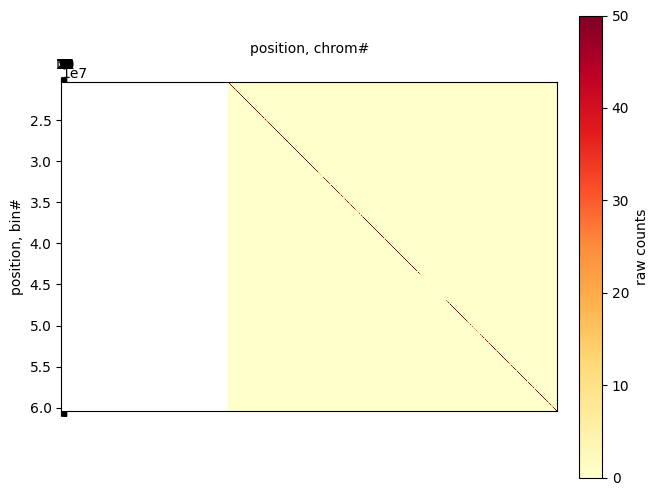

In [16]:
import matplotlib.pyplot as plt
import cooltools.lib.plotting

start, end = 20_347_151, 60_397_986
region = ('8', start, end)

f, ax = plt.subplots(figsize=(7,6))
im = ax.matshow(
    my_cooler.matrix(balance=False).fetch(region),
    vmax=50,
    extent=(start, end, end, start),cmap='YlOrRd');
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.set(xticks=chromstarts, xticklabels=my_cooler.chromnames,
       xlabel='position, chrom#', ylabel='position, bin#')
ax.xaxis.set_label_position('top')

MemoryError: Unable to allocate 1.39 TiB for an array with shape (617669, 617669) and data type int32

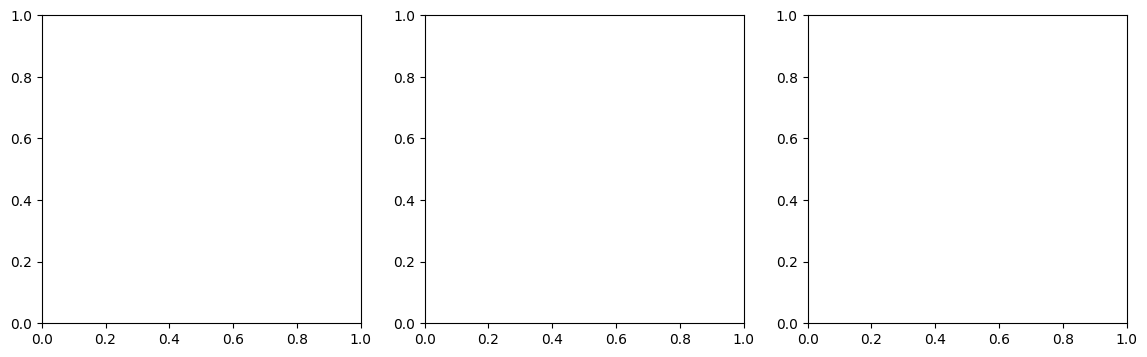

In [14]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')

def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

f, axs = plt.subplots(
    figsize=(14,4),
    ncols=3)

ax = axs[0]
im = ax.matshow(my_cooler.matrix(balance=False)[:], vmax=2500);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_xticks(chromstarts)
ax.set_xticklabels(my_cooler.chromnames)
ax.set_yticks(chromstarts)
ax.set_yticklabels(my_cooler.chromnames)
ax.xaxis.tick_bottom()
ax.set_title('All data')

ax = axs[1]
im = ax.matshow(
    my_cooler.matrix(balance=False).fetch('chr17'),
    vmax=2500,
    extent=(0,my_cooler.chromsizes['chr17'], my_cooler.chromsizes['chr17'], 0)
);
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
ax.set_title('chr17', y=1.08)
ax.set_ylabel('position, Mb')
format_ticks(ax)

ax = axs[2]
start, end = 30_000_000, 60_000_000
region = ('chr17', start, end)
im = ax.matshow(
    my_cooler.matrix(balance=False).fetch(region),
    vmax=2500,
    extent=(start, end, end, start)
);
ax.set_title(f'chr17:{start:,}-{end:,}', y=1.08)
plt.colorbar(im, ax=ax ,fraction=0.046, pad=0.04, label='raw counts');
format_ticks(ax)
plt.tight_layout()